<div class="alert alert-block alert-warning">

# Trust in AI for Public Sector Applications in Austria
This project investigates the attitudes of Austrian residents toward the use of AI in public sector applications, focusing on the factors that influence trust. The study examines how transparency, accountability, and other key variables impact trust levels in AI-driven decision-making in areas such as tax administration and social benefits.

## Research Questions
1. How do Austrian residents perceive the trustworthiness of AI-driven decisions in key public services such as tax administration and social benefit distribution?
2. **What practices in AI-driven decision-making in these public sector applications most affect residents' trust, namely transparency and accountability?**

## Hypotheses
- **H1: Transparency – Higher levels of transparency (process, outcome, and data) positively influence residents' trust in AI-driven public services.**
- **H2: Accountability – The presence of accountability measures, such as human oversight and the ability to appeal AI-driven decisions, positively influences residents' trust in AI-driven public services.**

This notebook will analyze survey data to answer these questions and test the hypotheses using statistical and exploratory techniques.


<div class="alert alert-block alert-warning">

# Step 1: Dataset Overview and Preparation
In this section, we will:
1. Load the dataset.
2. Get an overview of the data structure (columns, data types, missing values).
3. Clean and prepare the data for analysis, including:
   - Renaming columns for clarity.
   - Handling missing values.
   - Ensuring that Likert-scale variables are properly treated as ordinal data.


In [49]:
# Step 1: Import Libraries and Load Data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
import statsmodels.api as sm

In [50]:
# Load all data files
df = pd.read_csv('analysis_2025-01-02_10-50.csv')

# Create a df without the variable explanations
#df = df_full.drop(index=0)
df.head()

,Interview number (ongoing),Tax Scenario: How likely are you to trust AI in conducting the review correctly? (1 = very unlikely; 5 = very likely),Tax Scenario: How does the breakdown of process steps affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly),Tax Scenario: How does the option to contact a tax officer affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly),Tax Scenario: How likely are you to comply with the request? (1 = very unlikely; 5 = very likely),Benefits Scenario: How likely are you to trust AI in conducting the review correctly? (1 = very unlikely; 5 = very likely),Benefits Scenario: How do the details about which data was used in the decision process affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly),Benefits Scenario: How does the specific information about where you do not meet the criteria affect your trust in hte AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly),Benefits Scenario: How does the option to appeal the decision affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly),Familiarity with AI applications in public services,...,Influence Trust Factors: Process Transparency - information about the steps and involved people in the decision-making process,Influence Trust Factors: Outcome transparency - decision factors are explained for justification,Influence Trust Factors: Regular audits of the AI system,Influence Trust Factors: The ability to appeal AI decisions,Influence Trust Factors: Public reporting on AI decision-making outcomes,Age,Gender,Education Level,Employment Status,Austria
0,50,3,2,2,1,3,2,1,2,5,...,4,3,4.0,3,4,1,2,5,2,1
1,62,4,5,5,5,4,5,5,5,2,...,5,5,5.0,5,5,2,2,5,4,1
2,67,3,4,4,4,2,4,4,5,2,...,4,4,5.0,4,2,2,1,5,4,1
3,72,3,4,4,5,2,4,4,4,4,...,4,4,4.0,4,4,1,2,5,4,1
4,76,2,3,5,4,1,3,2,4,1,...,4,4,5.0,4,5,1,1,5,4,1


In [51]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Interview number (ongoing)                                                                                                                                                                                           0
Tax Scenario: How likely are you to trust AI in conducting the review correctly? (1 = very unlikely; 5 = very likely)                                                                                                0
Tax Scenario: How does the breakdown of process steps affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)                                            0
Tax Scenario: How does the option to contact a tax officer affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)                                       0
Tax Scenario: How likely are you to comply with the request? (1 = very unlikely; 5 = very likely)                         

<div class="alert alert-block alert-warning">

# Step 2: Exploring General Trust in AI
We will analyze the general trust questions in the survey to understand how respondents perceive AI's trustworthiness. 
This step includes:
- Visualizing the distribution of the composite trust variable.
- Calculating basic descriptive statistics.


In [52]:
# 2.1 Composite Trust Score
df['Composite_Trust'] = df[
    [
        'Tax Scenario: How likely are you to trust AI in conducting the review correctly? (1 = very unlikely; 5 = very likely)',
        'Benefits Scenario: How likely are you to trust AI in conducting the review correctly? (1 = very unlikely; 5 = very likely)',
        'overall assessment of AI in public services'
    ]
].mean(axis=1)

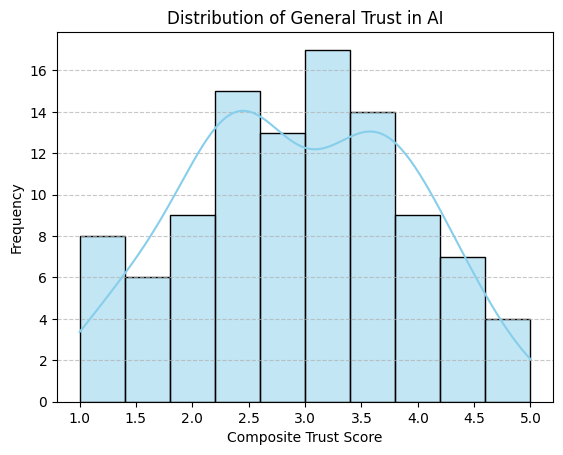

General Trust Statistics:
 count    102.000000
mean       2.928105
std        0.966578
min        1.000000
25%        2.333333
50%        2.833333
75%        3.666667
max        5.000000
Name: Composite_Trust, dtype: float64


In [53]:
# Visualize the distribution of the Composite Trust variable
sns.histplot(df['Composite_Trust'], kde=True, bins=10, color='skyblue')
plt.title("Distribution of General Trust in AI")
plt.xlabel("Composite Trust Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Descriptive statistics for Composite Trust
trust_stats = df['Composite_Trust'].describe()
print("General Trust Statistics:\n", trust_stats)


<div class="alert alert-block alert-warning">

# Step 3: Exploring Perceptions of Influencing Factors
This step focuses on analyzing how respondents perceive the importance of various factors that influence trust in AI-driven public services. 
These factors include:
- Data Transparency
- Process Transparency
- Outcome Transparency
- Regular Audits
- Appeal Options
- Human Oversight

We will:
1. Calculate the average rating for each factor.
2. Visualize these ratings to identify which factors are perceived as most important.
3. Include standard deviations to observe variability in responses.


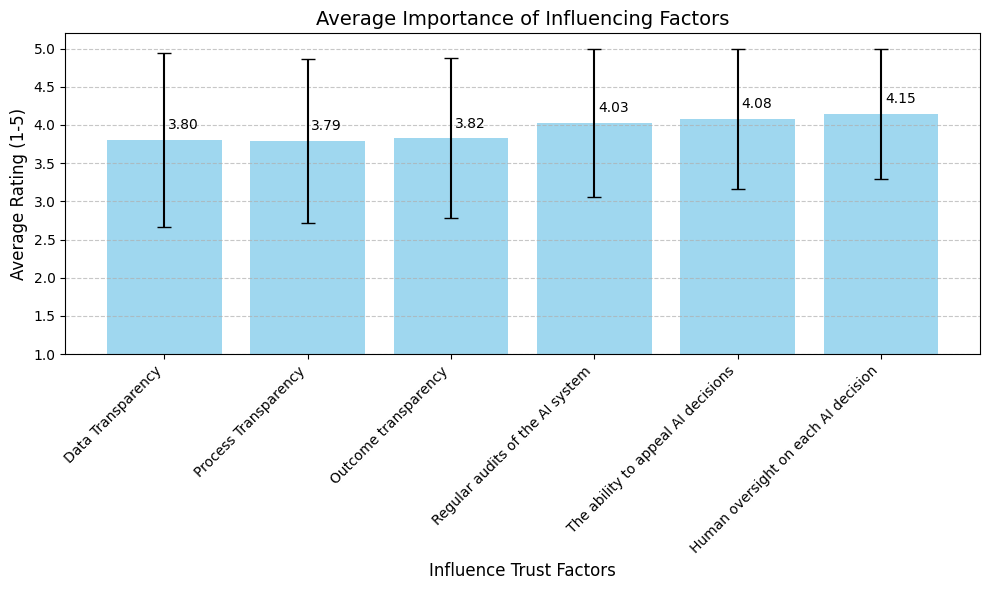

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Define influencing factors
influence_factors = [
    'Influence Trust Factors: Data Transparency - information about the personal data used for the decision',
    'Influence Trust Factors: Process Transparency - information about the steps and involved people in the decision-making process',
    'Influence Trust Factors: Outcome transparency - decision factors are explained for justification',
    'Influence Trust Factors: Regular audits of the AI system',
    'Influence Trust Factors: The ability to appeal AI decisions',
    'Influence Trust Factors: Human oversight on each AI decision'
]

# Calculate mean and standard deviation for each factor
factor_stats = df[influence_factors].describe().T[['mean', 'std']]

# Rename x-axis labels
renamed_labels = [
    'Data Transparency',
    'Process Transparency',
    'Outcome transparency',
    'Regular audits of the AI system',
    'The ability to appeal AI decisions',
    'Human oversight on each AI decision'
]

# Cap error bars at 5
error_bars_capped = np.minimum(factor_stats['mean'] + factor_stats['std'], 5) - factor_stats['mean']

# Plot mean importance of factors with error bars for standard deviation
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(
    renamed_labels,  # Use renamed labels
    factor_stats['mean'],
    yerr=error_bars_capped,  # Use capped error bars
    color='skyblue',
    capsize=5,
    alpha=0.8
)

# Set Y-axis scale with extra space above 5
ax.set_ylim(1, 5.2)  # Add space above 5 for the error bars

# Add mean values on top of bars
for bar, mean in zip(bars, factor_stats['mean']):
    ax.text(
        bar.get_x() + bar.get_width() / 1.5,  # Adjusted for slight right shift
        bar.get_height() + 0.1,
        f'{mean:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add labels, title, and styling
ax.set_title("Average Importance of Influencing Factors", fontsize=14)
ax.set_xlabel("Influence Trust Factors", fontsize=12)
ax.set_ylabel("Average Rating (1-5)", fontsize=12)
ax.set_xticks(range(len(renamed_labels)))
ax.set_xticklabels(renamed_labels, rotation=45, ha='right', fontsize=10)  # Rotate labels diagonally
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-warning">

# Step 4: Exploring Group Differences
In this step, we analyze how perceptions of all influencing factors differ across demographic groups. 
We will:
1. Compare the perceived importance of all influencing factors by Age Group.
2. Compare the perceived importance of all influencing factors by Gender.
3. Visualize these comparisons using boxplots.

This analysis helps us understand whether demographic factors influence perceptions of trust factors like transparency and accountability.


Age_Group
25–34          36
18–24          26
35–44          20
45–54          11
55–64           5
65 or older     4
Name: count, dtype: int64


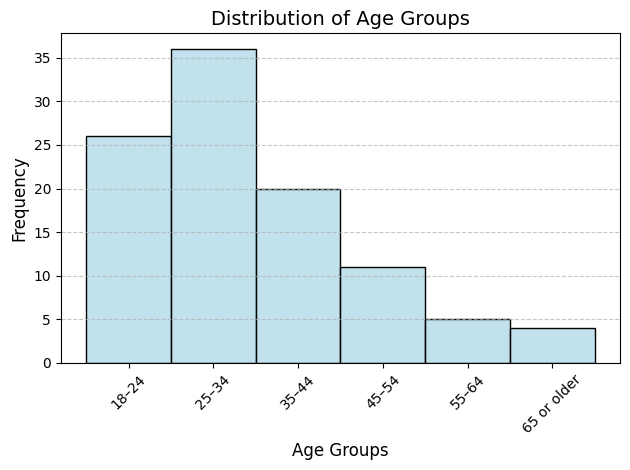

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins and labels for age groups based on the survey values
age_bins = [1, 2, 3, 4, 5, 6, 7]  # Includes an extra bin for upper bound
age_labels = [
    "18–24", "25–34", "35–44", "45–54", "55–64", "65 or older"
]

# Assign age groups to a new column
df['Age_Group'] = pd.cut(
    df['Age'], 
    bins=age_bins, 
    labels=age_labels, 
    right=False  # Ensures the lower bound is included in the bin
)

# Check distribution of age groups
print(df['Age_Group'].value_counts())

# Show age groups with updated light blue color
sns.histplot(df['Age_Group'], kde=False, color="lightblue")
plt.title("Distribution of Age Groups", fontsize=14)
plt.xlabel("Age Groups", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



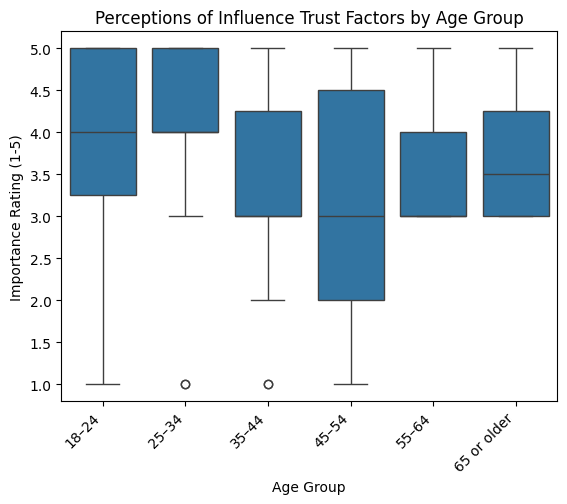

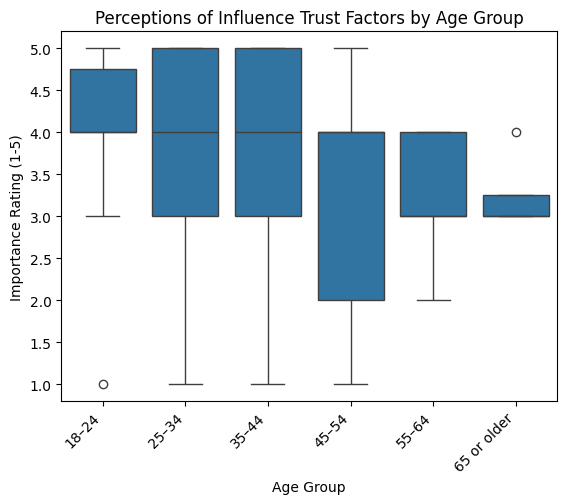

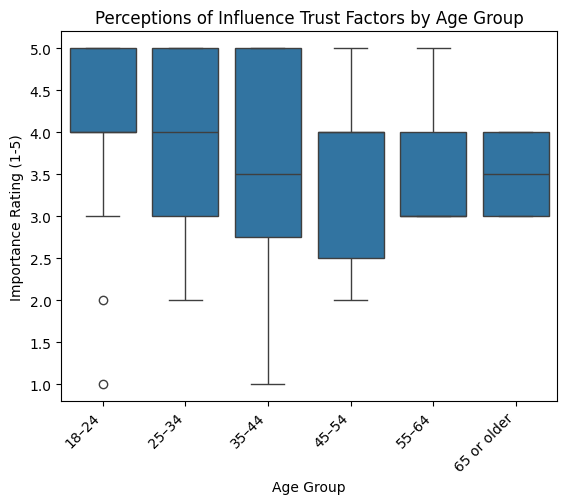

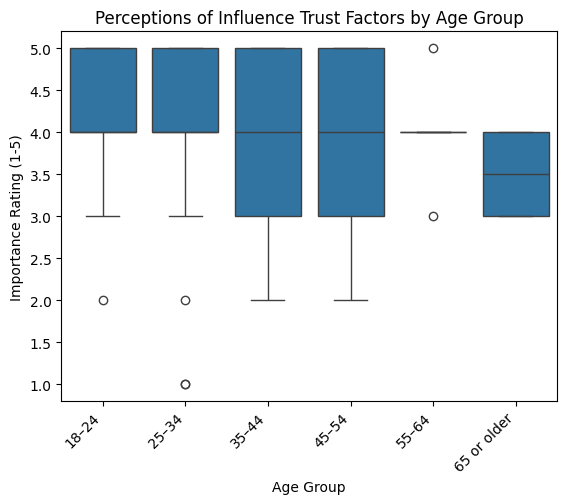

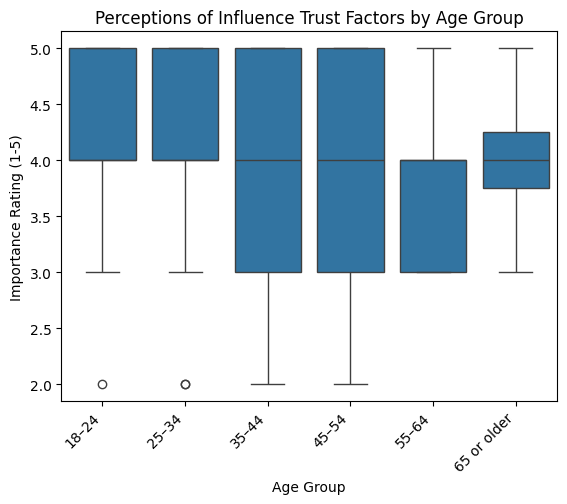

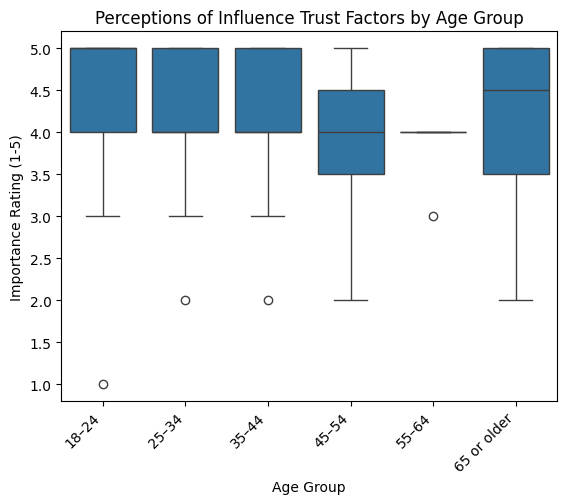

In [56]:
# Plot all influencing factors by Age Group
for factor in influence_factors:
    sns.boxplot(x=df['Age_Group'], y=df[factor])
    plt.title(f"Perceptions of {factor.split(':')[0]} by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Importance Rating (1-5)")
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [57]:
# Map gender codes to labels
df['Gender'] = df['Gender'].map({1: 'Male', 2: 'Female', 3: 'Non-binary', 4: 'Prefer not to say'})

# Check the distribution of Gender
print("Gender Distribution:\n", df['Gender'].value_counts())


Gender Distribution:
 Gender
Female    62
Male      40
Name: count, dtype: int64


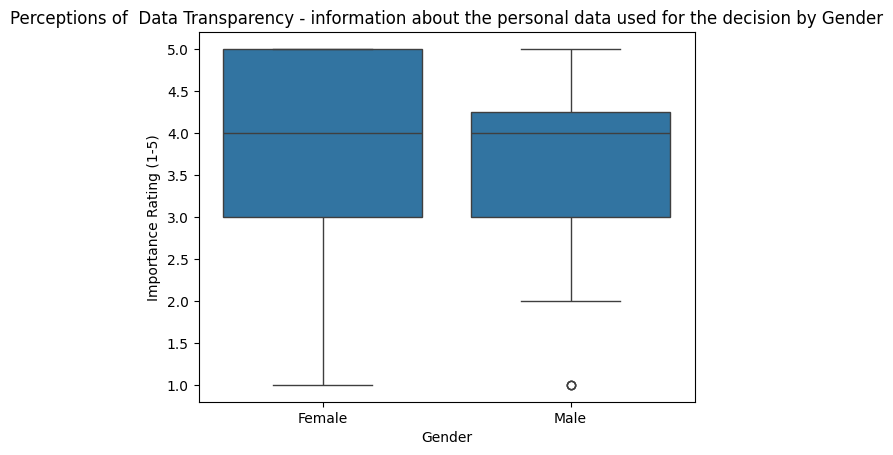

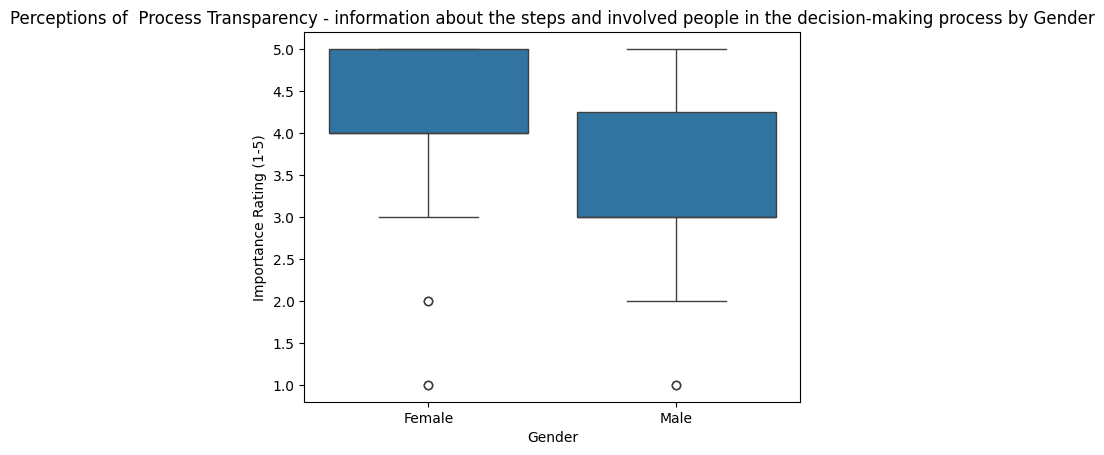

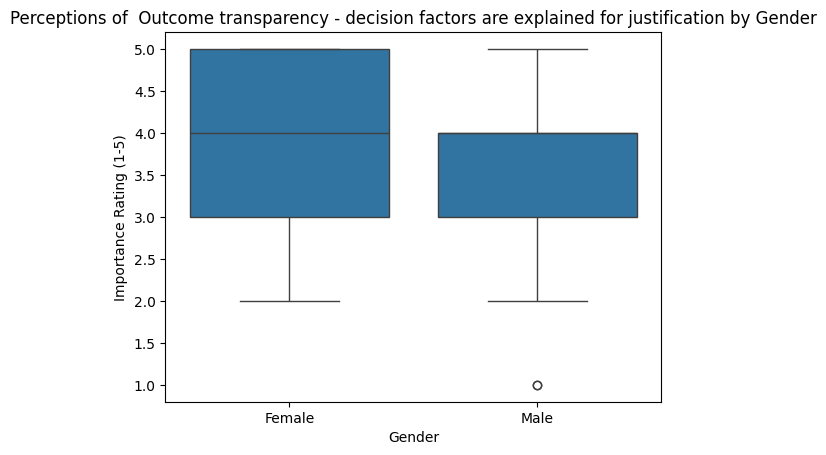

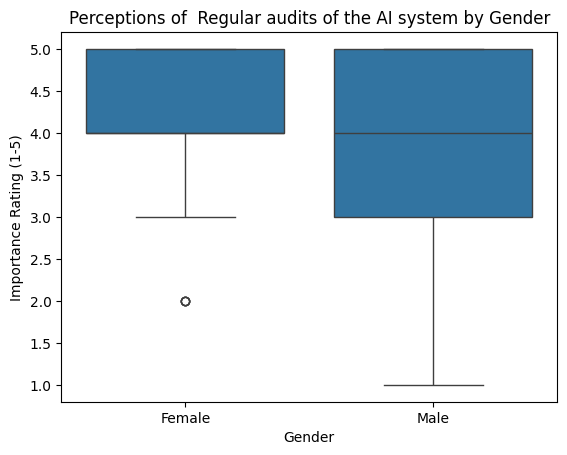

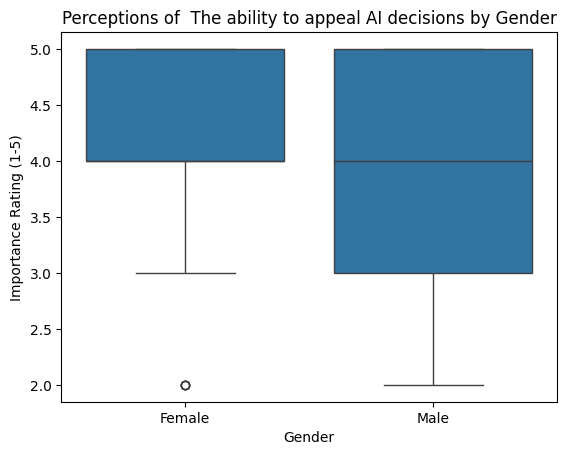

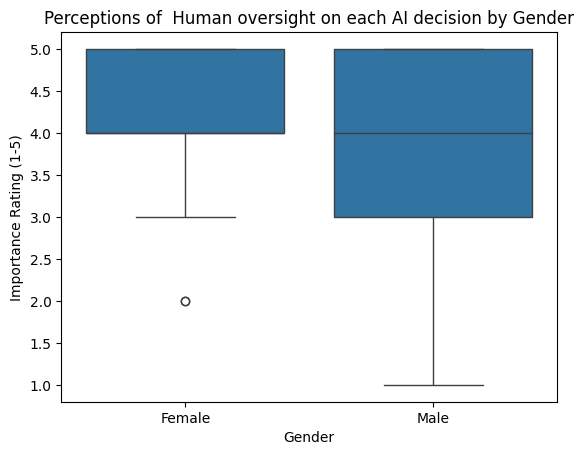

In [58]:
# Plot all influencing factors by Gender
for factor in influence_factors:
    sns.boxplot(x=df['Gender'], y=df[factor])
    plt.title(f"Perceptions of {factor.split(':')[1]} by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Importance Rating (1-5)")
    plt.show()


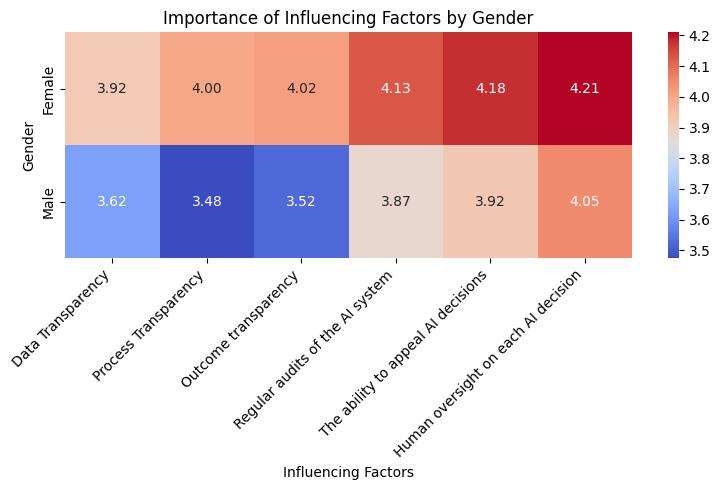

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define influencing factors
influence_factors = [
    'Influence Trust Factors: Data Transparency - information about the personal data used for the decision',
    'Influence Trust Factors: Process Transparency - information about the steps and involved people in the decision-making process',
    'Influence Trust Factors: Outcome transparency - decision factors are explained for justification',
    'Influence Trust Factors: Regular audits of the AI system',
    'Influence Trust Factors: The ability to appeal AI decisions',
    'Influence Trust Factors: Human oversight on each AI decision'
]

# Rename x-axis labels
renamed_labels = [
    'Data Transparency',
    'Process Transparency',
    'Outcome transparency',
    'Regular audits of the AI system',
    'The ability to appeal AI decisions',
    'Human oversight on each AI decision'
]

# Mean ratings by Gender
group_means_gender = df.groupby('Gender')[influence_factors].mean()

# Plot heatmap to visualize differences
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(group_means_gender, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Importance of Influencing Factors by Gender")
plt.xlabel("Influencing Factors")
plt.ylabel("Gender")

# Update x-axis tick labels to renamed_labels in the center
heatmap.set_xticks([x + 0.5 for x in range(len(renamed_labels))])  # Center ticks
heatmap.set_xticklabels(renamed_labels, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-warning">

# Step 5: Analysis of Influencing Factors in the Two Scenarios
This step focuses on how respondents rated the importance of influencing factors in the two specific scenarios:
1. **Tax Review Scenario**
2. **Benefits Scenario**

We will:
1. Calculate the mean ratings for influencing factors separately for each scenario.
2. Compare and visualize the results to identify differences in how trust factors are perceived across the two scenarios.
This helps us understand whether the context of the decision-making process influences the perceived importance of transparency and accountability.


                                                    Tax Scenario  \
Benefits Scenario: How do the details about whi...           NaN   
Benefits Scenario: How does the option to appea...           NaN   
Benefits Scenario: How does the specific inform...           NaN   
Benefits Scenario: How likely are you to trust ...           NaN   
Tax Scenario: How does the breakdown of process...      3.509804   
Tax Scenario: How does the option to contact a ...      3.529412   
Tax Scenario: How likely are you to comply with...      3.784314   
Tax Scenario: How likely are you to trust AI in...      3.049020   

                                                    Benefits Scenario  
Benefits Scenario: How do the details about whi...           3.382353  
Benefits Scenario: How does the option to appea...           3.470588  
Benefits Scenario: How does the specific inform...           3.303922  
Benefits Scenario: How likely are you to trust ...           2.764706  
Tax Scenario: How does the 

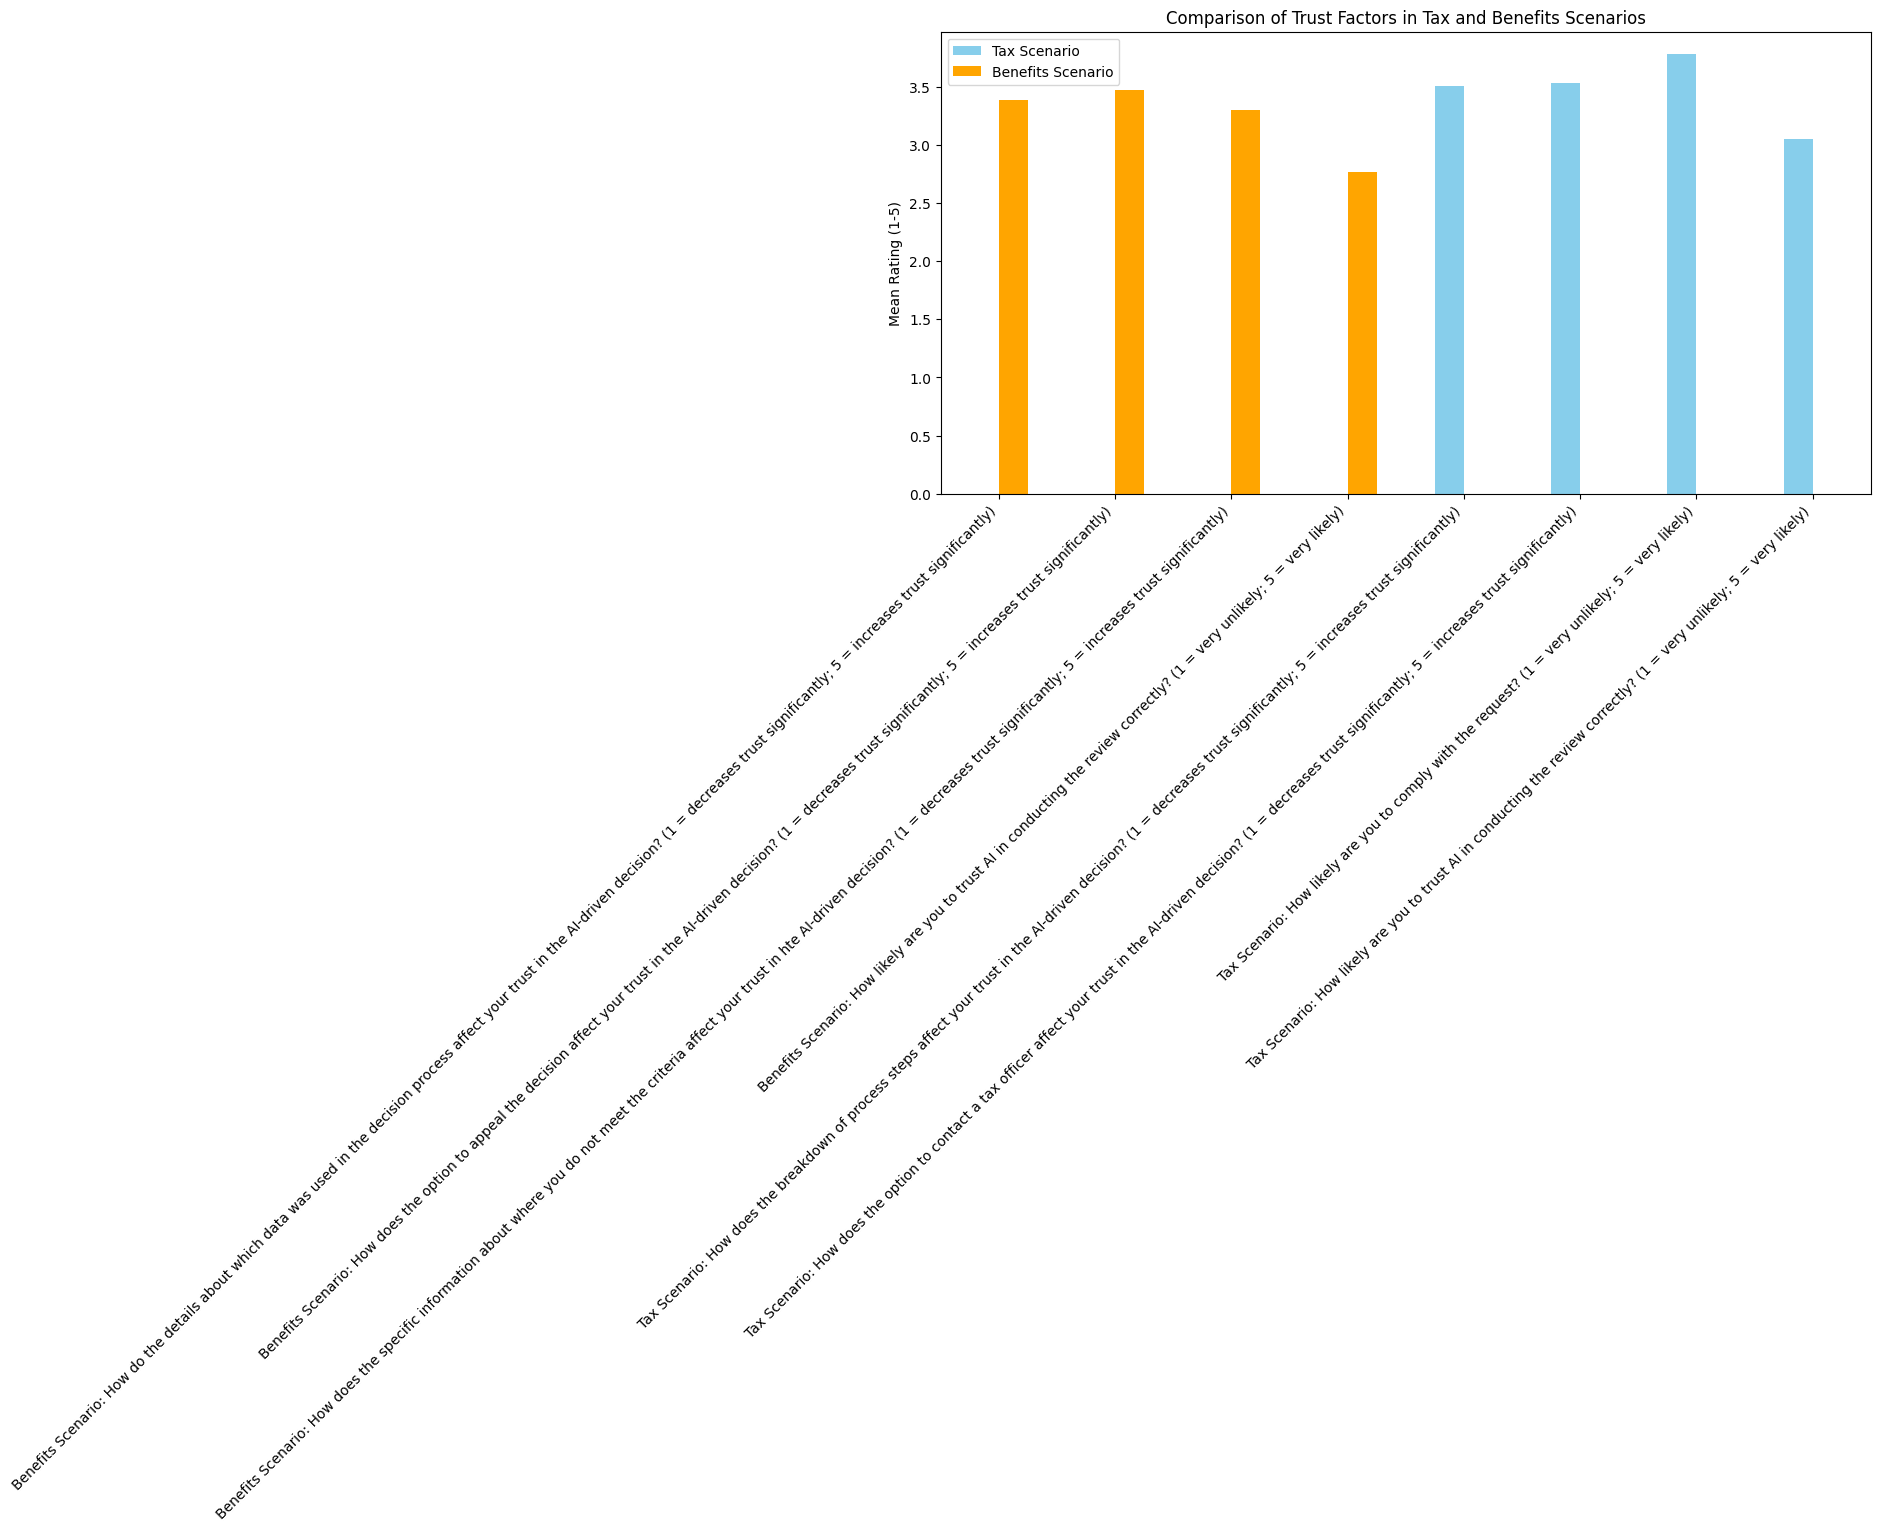

In [60]:
# Define the variables for Tax Scenario
tax_factors = [
    'Tax Scenario: How likely are you to trust AI in conducting the review correctly? (1 = very unlikely; 5 = very likely)',
    'Tax Scenario: How does the breakdown of process steps affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)',
    'Tax Scenario: How does the option to contact a tax officer affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)',
    'Tax Scenario: How likely are you to comply with the request? (1 = very unlikely; 5 = very likely)'
]

# Define the variables for Benefits Scenario
benefits_factors = [
    'Benefits Scenario: How likely are you to trust AI in conducting the review correctly? (1 = very unlikely; 5 = very likely)',
    'Benefits Scenario: How do the details about which data was used in the decision process affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)',
    'Benefits Scenario: How does the specific information about where you do not meet the criteria affect your trust in hte AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)',
    'Benefits Scenario: How does the option to appeal the decision affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)'
]

# Calculate the average ratings for Tax and Benefits scenarios
tax_means = df[tax_factors].mean()
benefits_means = df[benefits_factors].mean()

# Combine the results into a DataFrame for comparison
scenario_comparison = pd.DataFrame({
    'Tax Scenario': tax_means,
    'Benefits Scenario': benefits_means
})
print(scenario_comparison)

# Plot the comparison
scenario_comparison.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title("Comparison of Trust Factors in Tax and Benefits Scenarios")
plt.ylabel("Mean Rating (1-5)")
plt.xticks(rotation=45, ha='right')
plt.show()





<div class="alert alert-block alert-warning">

# Step 6: Comparing Trust Ratings Across Scenarios

**What we are doing:**
- We compare the average trust ratings for the **Tax Scenario** and **Benefits Scenario**.
- A paired t-test is performed to evaluate if the difference in trust ratings between these two scenarios is statistically significant.
- A bar plot is used to visualize the average ratings for both scenarios.

**Why it is important:**
- This step helps us understand whether trust in AI-driven decisions differs depending on the scenario in which the AI is applied.
- Identifying significant differences provides insight into scenario-specific trust factors.


Wilcoxon Signed-Rank Test: Statistic=462.00, P-value=0.0065
Paired t-test: Statistic=2.63, P-value=0.0100


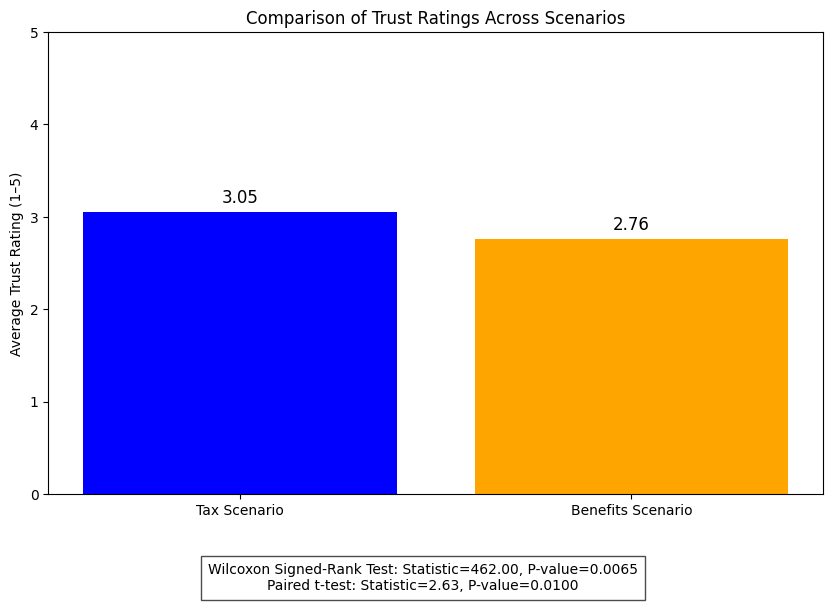

In [61]:
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, ttest_rel

# Define the variables for Tax Scenario
tax_factors = [
    'Tax Scenario: How likely are you to trust AI in conducting the review correctly? (1 = very unlikely; 5 = very likely)',
]

# Define the variables for Benefits Scenario
benefits_factors = [
    'Benefits Scenario: How likely are you to trust AI in conducting the review correctly? (1 = very unlikely; 5 = very likely)',
]

# Calculate means for both scenarios
tax_means = df[tax_factors].mean(axis=1)
benefits_means = df[benefits_factors].mean(axis=1)

# Perform Wilcoxon Signed-Rank Test
wilcoxon_stat, wilcoxon_p_value = wilcoxon(tax_means, benefits_means)

# Perform Paired t-test
t_stat, t_p_value = ttest_rel(tax_means, benefits_means)

# Print statistical results
print(f"Wilcoxon Signed-Rank Test: Statistic={wilcoxon_stat:.2f}, P-value={wilcoxon_p_value:.4f}")
print(f"Paired t-test: Statistic={t_stat:.2f}, P-value={t_p_value:.4f}")

# Plot comparison of average trust ratings
plt.figure(figsize=(10, 6))
plt.bar(
    ['Tax Scenario', 'Benefits Scenario'], 
    [tax_means.mean(), benefits_means.mean()], 
    color=['blue', 'orange']
)
plt.title("Comparison of Trust Ratings Across Scenarios")
plt.ylabel("Average Trust Rating (1–5)")
plt.ylim(0, 5)

# Add mean values as text above the bars
plt.text(0, tax_means.mean() + 0.1, f"{tax_means.mean():.2f}", ha='center', fontsize=12)
plt.text(1, benefits_means.mean() + 0.1, f"{benefits_means.mean():.2f}", ha='center', fontsize=12)

# Display the p-values on the plot with more vertical space
plt.figtext(
    0.5, -0.05,  # Adjust the vertical position to create more space
    f"Wilcoxon Signed-Rank Test: Statistic={wilcoxon_stat:.2f}, P-value={wilcoxon_p_value:.4f}\n"
    f"Paired t-test: Statistic={t_stat:.2f}, P-value={t_p_value:.4f}",
    ha="center", fontsize=10, bbox={"facecolor": "white", "alpha": 0.7, "pad": 5}
)

plt.show()


<div class="alert alert-block alert-success">

### Results:
- **Tax Scenario**: Average trust rating = **3.05**
- **Benefits Scenario**: Average trust rating = **2.76**
- **Wilcoxon Signed-Rank Test**:
  - **Statistic** = 462.00
  - **P-value** = 0.0065

### Conclusion:
- There is a **statistically significant difference** in trust ratings between the two scenarios (**p < 0.05**) based on the **Wilcoxon Signed-Rank Test**, which is suitable for ordinal data.
- Participants reported **higher trust** in the **Tax Scenario** compared to the **Benefits Scenario**.
- These results confirm the relevance of **scenario-specific factors** in shaping trust in AI-driven public services.

<div class="alert alert-block alert-warning">

## Hypotheses
- **H1: Transparency – Higher levels of transparency (process, outcome, and data) positively influence residents' trust in AI-driven public services.**
- H2: Accountability – The presence of accountability measures, such as human oversight and the ability to appeal AI-driven decisions, positively influences residents' trust in AI-driven public services.

<div class="alert alert-block alert-warning">

### Step 7: Analyzing Transparency and Trust in AI-Driven Public Services

**What we are doing:**
- We focus on the survey questions specifically related to transparency (process, outcome, and data).
- We analyze these questions separately for:
  - The **scenarios** (Tax and Benefits).
  - The **general transparency-related questions** in the rest of the survey.

**Why it is important:**
- This step evaluates how transparency (process, outcome, and data) influences trust in AI, addressing **Hypothesis 1** (H1).

---

#### Substep 7.1: Analyze Transparency Questions in the Scenarios

- Transparency-related questions in the **Tax Scenario**:
  1. *"How does the breakdown of process steps affect your trust in the AI-driven decision?"*
  
- Transparency-related questions in the **Benefits Scenario**:
  1. *"How do the details about which data was used in the decision process affect your trust in the AI-driven decision?"*
  2. *"How does the specific information about where you do not meet the criteria affect your trust in the AI-driven decision?"*

**Analysis Plan:**
1. Calculate the **mean ratings** for each transparency-related question in the scenarios.
2. Visualize the ratings with bar plots to compare the perceived impact of transparency in the Tax and Benefits Scenarios.

---

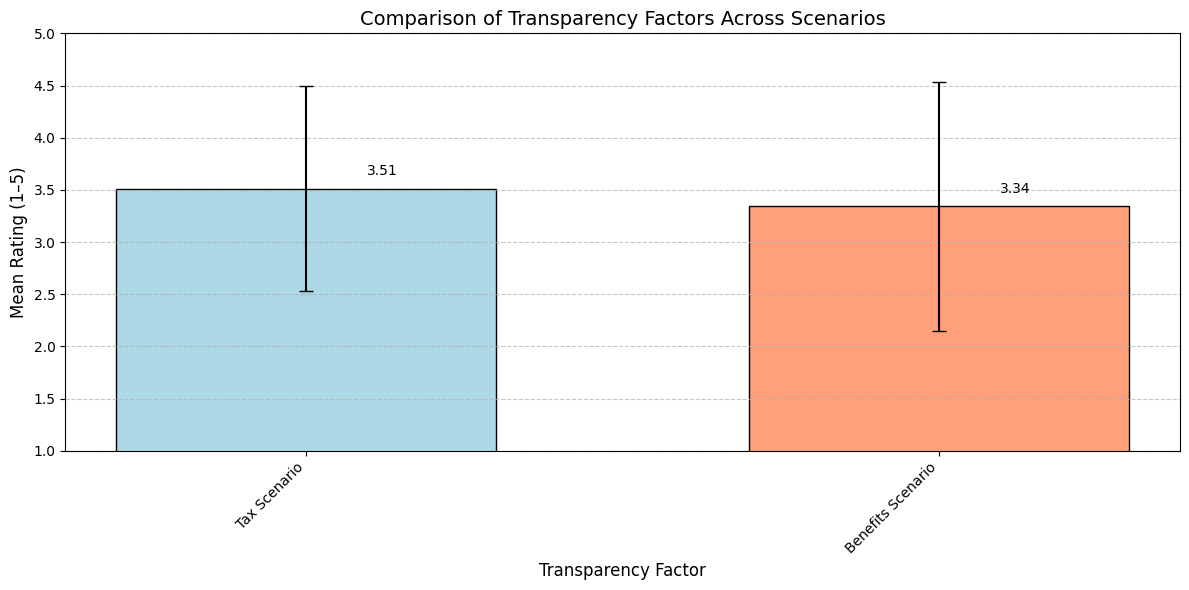

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the transparency-related variables for the Tax and Benefits Scenarios
tax_transparency = [
    'Tax Scenario: How does the breakdown of process steps affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)'
]

benefits_transparency = [
    'Benefits Scenario: How do the details about which data was used in the decision process affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)',
    'Benefits Scenario: How does the specific information about where you do not meet the criteria affect your trust in hte AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)'
]

# Calculate the mean and standard deviation for transparency-related questions
tax_transparency_mean = df[tax_transparency].mean()
tax_transparency_std = df[tax_transparency].std()

benefits_transparency_mean = df[benefits_transparency].mean()
benefits_transparency_std = df[benefits_transparency].std()

# Combine the results into a DataFrame for easier comparison
scenario_transparency_comparison = pd.DataFrame({
    'Transparency Factor': ['Tax Scenario', 'Benefits Scenario'],
    'Mean Rating': [
        tax_transparency_mean.mean(),
        benefits_transparency_mean.mean()
    ],
    'Std Dev': [
        tax_transparency_std.mean(),
        benefits_transparency_std.mean()
    ]
})

# Plot the comparison with narrower bars and error bars
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(
    scenario_transparency_comparison['Transparency Factor'],
    scenario_transparency_comparison['Mean Rating'],
    yerr=scenario_transparency_comparison['Std Dev'],  # Error bars
    color=['lightblue', 'lightsalmon'],
    edgecolor='black',
    capsize=5,
    width=0.6  # Adjusted width for narrower bars
)

# Set Y-axis scale
ax.set_ylim(1, 5)

# Add mean values slightly to the right of the bars
for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() * 0.70,  # Moved slightly to the right
        bar.get_height() + 0.1,
        f'{bar.get_height():.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add labels, title, and styling
ax.set_title("Comparison of Transparency Factors Across Scenarios", fontsize=14)
ax.set_ylabel("Mean Rating (1–5)", fontsize=12)
ax.set_xlabel("Transparency Factor", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [63]:
from scipy.stats import wilcoxon

# Extract the transparency ratings for the two scenarios
tax_transparency = df[
    'Tax Scenario: How does the breakdown of process steps affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)'
]
benefits_transparency = df[
    'Benefits Scenario: How do the details about which data was used in the decision process affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)'
]

# Perform the Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(tax_transparency, benefits_transparency, alternative='two-sided')

# Output the results
print(f"Wilcoxon Signed-Rank Test: Statistic={stat}, P-value={p_value}")


Wilcoxon Signed-Rank Test: Statistic=449.5, P-value=0.2030465133732402


<div class="alert alert-block alert-success">

### Wilcoxon Signed-Rank Test: Transparency Ratings in Tax and Benefits Scenarios

**Objective:**  
To compare the transparency ratings between the Tax Scenario and Benefits Scenario using the Wilcoxon Signed-Rank Test, as the data is paired and ordinal in scale.

**Result:**  
- **Test Statistic:** 449.5  
- **P-value:** 0.203  

**Interpretation:**  
- The p-value (0.203) is greater than the conventional significance level of 0.05.  
- This indicates that there is no statistically significant difference in transparency ratings between the Tax and Benefits Scenarios.  

**Conclusion:**  
The transparency-related trust ratings do not show a significant difference between the two scenarios, suggesting that participants perceive transparency similarly in both contexts.


<div class="alert alert-block alert-warning">

#### Substep 7.2: Analyze Transparency Questions in the Rest of the Survey

- General transparency-related questions in the survey:
  1. *"Influence Trust Factors: Data Transparency - information about the personal data used for the decision"*
  2. *"Influence Trust Factors: Process Transparency - information about the steps and involved people in the decision-making process"*
  3. *"Influence Trust Factors: Outcome Transparency - decision factors are explained for justification"*

**Analysis Plan:**
1. Calculate the **mean ratings** for these general transparency-related trust factors.
2. Compare the ratings across different transparency dimensions to identify which type of transparency (data, process, outcome) is perceived as most influential.


                              Transparency Dimension  Mean Rating
2  Influence Trust Factors: Outcome transparency ...     3.823529
0  Influence Trust Factors: Data Transparency - i...     3.803922
1  Influence Trust Factors: Process Transparency ...     3.794118


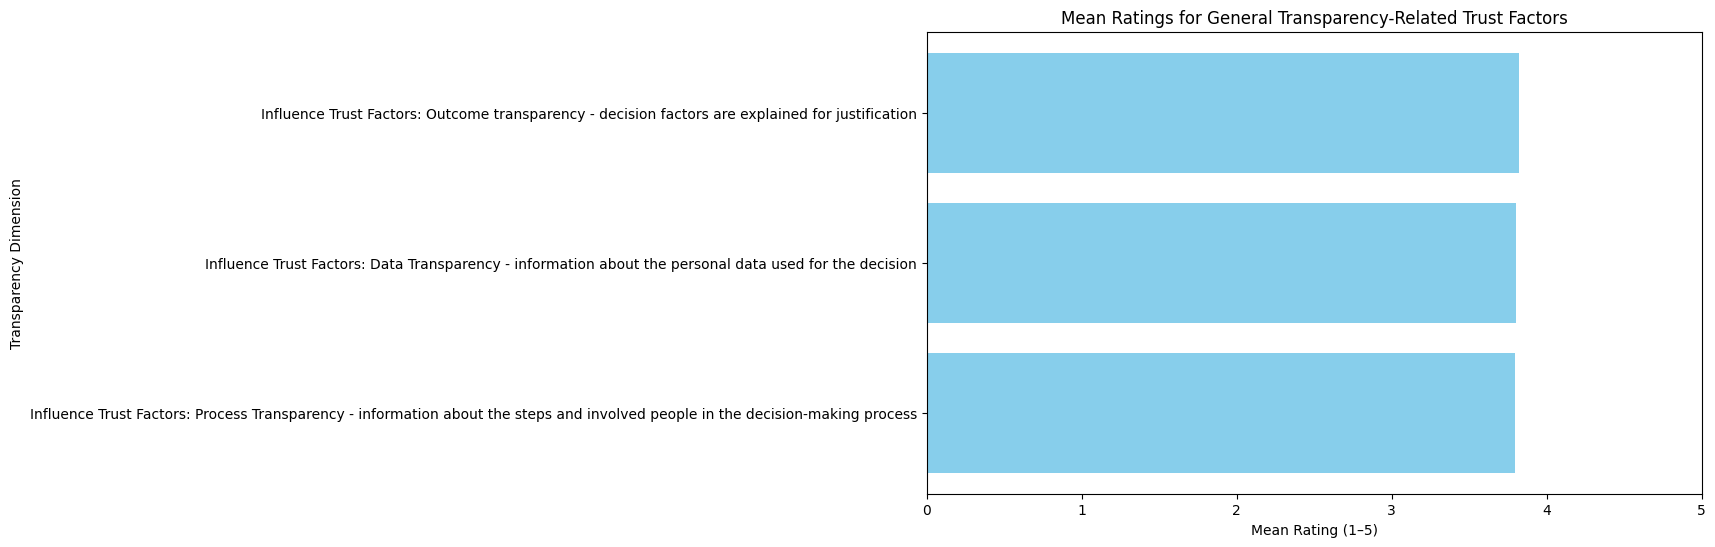

In [64]:
# Define the variables for general transparency-related trust factors
general_transparency_factors = [
    "Influence Trust Factors: Data Transparency - information about the personal data used for the decision",
    "Influence Trust Factors: Process Transparency - information about the steps and involved people in the decision-making process",
    "Influence Trust Factors: Outcome transparency - decision factors are explained for justification"
]

# Calculate the mean ratings for these factors
transparency_means = df[general_transparency_factors].mean()

# Create a DataFrame to organize the results
transparency_summary = pd.DataFrame({
    "Transparency Dimension": general_transparency_factors,
    "Mean Rating": transparency_means
}).reset_index(drop=True)

# Sort the DataFrame by mean ratings
transparency_summary = transparency_summary.sort_values(by="Mean Rating", ascending=False)

# Display the summary table
print(transparency_summary)

# Plot the mean ratings for transparency factors
plt.figure(figsize=(10, 6))
plt.barh(transparency_summary["Transparency Dimension"], transparency_summary["Mean Rating"], color="skyblue")
plt.xlabel("Mean Rating (1–5)")
plt.ylabel("Transparency Dimension")
plt.title("Mean Ratings for General Transparency-Related Trust Factors")
plt.xlim(0, 5)  # Ensure the x-axis represents the full scale (1–5)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


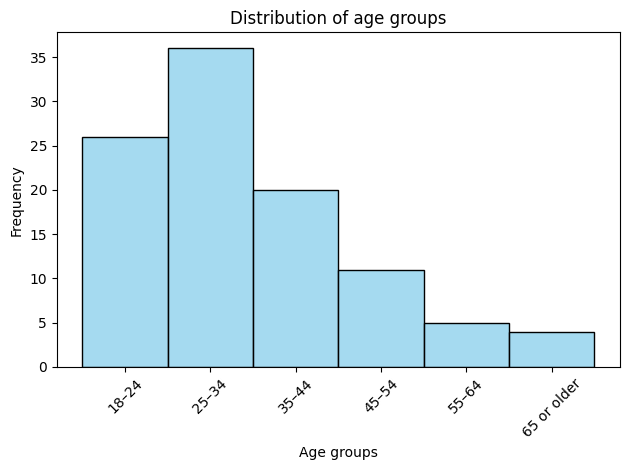

/var/folders/9r/n7jjrq_94571fdc9t11nk6180000gn/T/ipykernel_12740/3234952986.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='Transparency_Mean', palette='Blues')


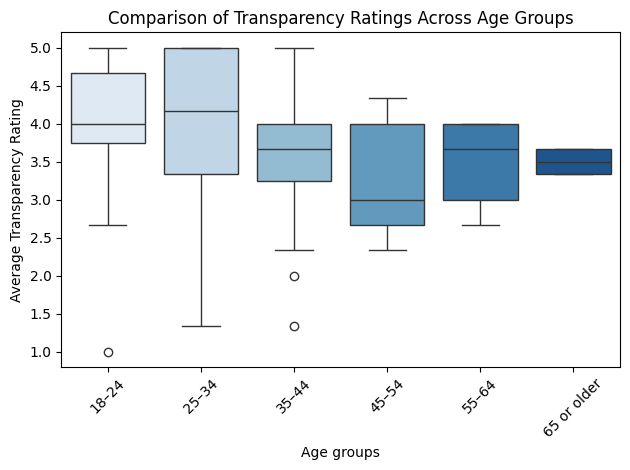

/var/folders/9r/n7jjrq_94571fdc9t11nk6180000gn/T/ipykernel_12740/3234952986.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Transparency_Mean', palette='Greens')


Kruskal-Wallis Test for Age Groups: Statistic=12.73, P-value=0.0261


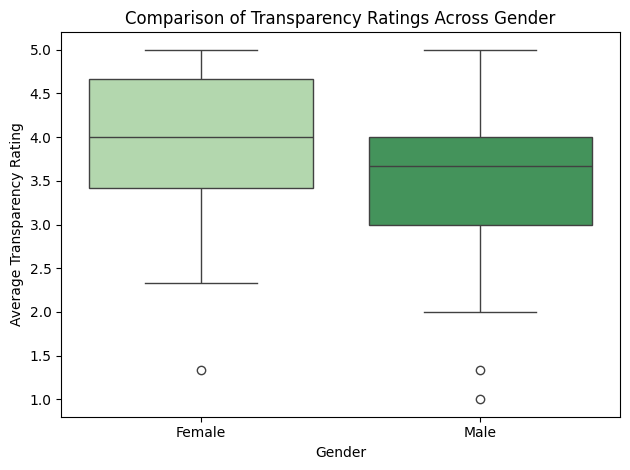

Kruskal-Wallis Test for Gender: Statistic=5.28, P-value=0.0216


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Transparency-related variables
transparency_vars = [
    'Influence Trust Factors: Data Transparency - information about the personal data used for the decision',
    'Influence Trust Factors: Process Transparency - information about the steps and involved people in the decision-making process',
    'Influence Trust Factors: Outcome transparency - decision factors are explained for justification'
]

# Step 1: Calculate mean transparency ratings
df['Transparency_Mean'] = df[transparency_vars].mean(axis=1)

# Step 2: Analyze relationship with Age Groups
# Visualize age group distribution
sns.histplot(data=df, x='Age_Group', kde=False, color='skyblue')
plt.title("Distribution of age groups")
plt.xlabel("Age groups")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compare Transparency_Mean across Age Groups
sns.boxplot(data=df, x='Age_Group', y='Transparency_Mean', palette='Blues')
plt.title("Comparison of Transparency Ratings Across Age Groups")
plt.xlabel("Age groups")
plt.ylabel("Average Transparency Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Kruskal-Wallis Test for Age Groups
age_groups = [df[df['Age_Group'] == age]['Transparency_Mean'] for age in df['Age_Group'].unique()]
kruskal_stat_age, p_value_age = kruskal(*age_groups)
print(f"Kruskal-Wallis Test for Age Groups: Statistic={kruskal_stat_age:.2f}, P-value={p_value_age:.4f}")

# Step 3: Analyze relationship with Gender
sns.boxplot(data=df, x='Gender', y='Transparency_Mean', palette='Greens')
plt.title("Comparison of Transparency Ratings Across Gender")
plt.xlabel("Gender")
plt.ylabel("Average Transparency Rating")
plt.tight_layout()
plt.show()

# Kruskal-Wallis Test for Gender
gender_groups = [df[df['Gender'] == gender]['Transparency_Mean'] for gender in df['Gender'].unique()]
kruskal_stat_gender, p_value_gender = kruskal(*gender_groups)
print(f"Kruskal-Wallis Test for Gender: Statistic={kruskal_stat_gender:.2f}, P-value={p_value_gender:.4f}")


/var/folders/9r/n7jjrq_94571fdc9t11nk6180000gn/T/ipykernel_12740/2054065845.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=familiarity_melted, x='Familiarity_Type', y='Transparency_Mean', palette='coolwarm')
/var/folders/9r/n7jjrq_94571fdc9t11nk6180000gn/T/ipykernel_12740/2054065845.py:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


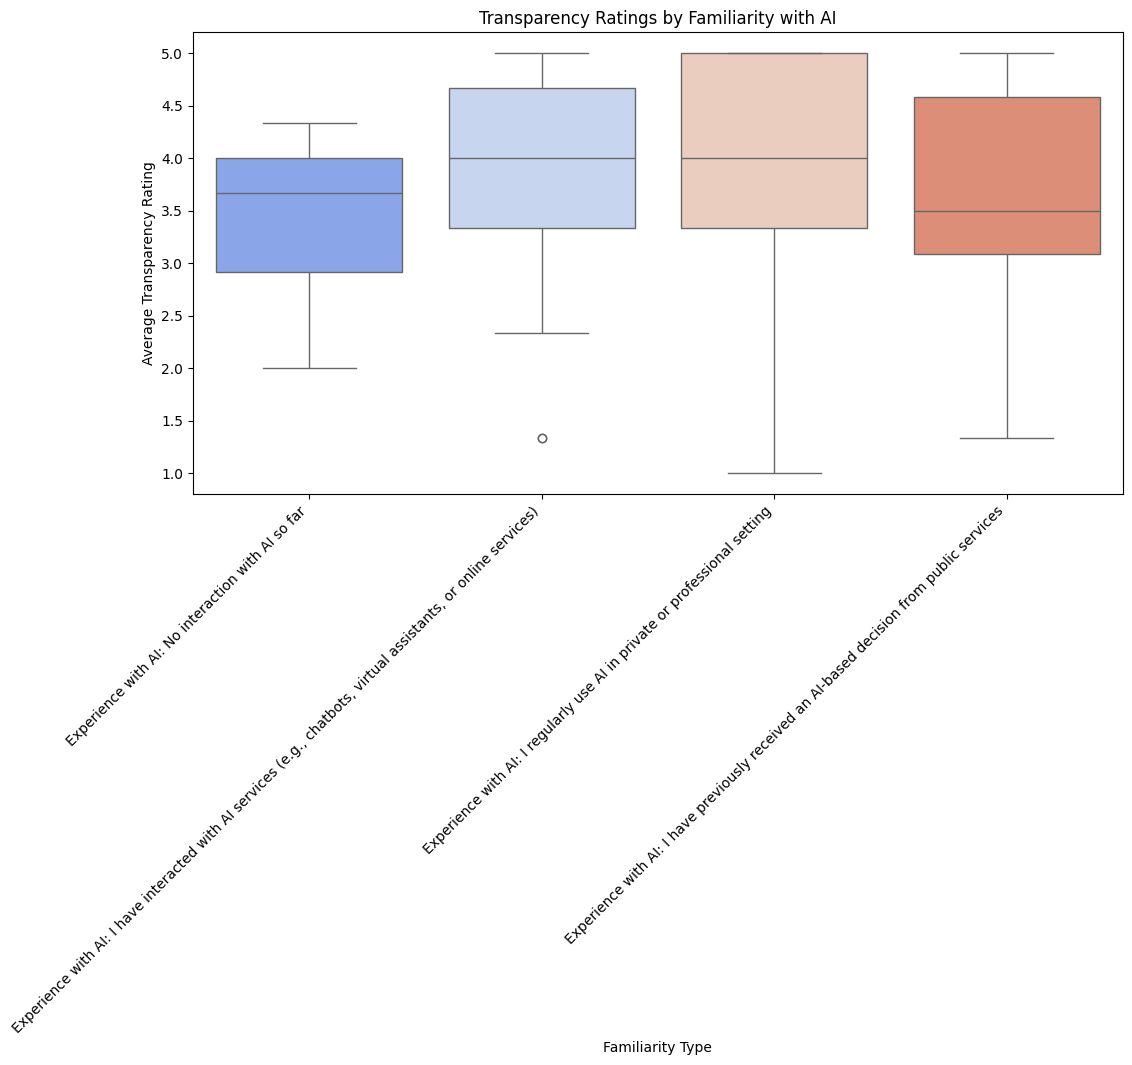

Kruskal-Wallis Test for Familiarity: Statistic=5.85, P-value=0.1192


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Columns representing familiarity options
familiarity_options = [
    'Experience with AI: No interaction with AI so far',
    'Experience with AI: I have interacted with AI services (e.g., chatbots, virtual assistants, or online services)',
    'Experience with AI: I regularly use AI in private or professional setting',
    'Experience with AI: I have previously received an AI-based decision from public services'
]

# Step 1: Create a melted dataset for plotting
familiarity_melted = df.melt(
    id_vars=['Transparency_Mean'],
    value_vars=familiarity_options,
    var_name='Familiarity_Type',
    value_name='Selected'
)

# Filter to only include rows where the option was selected
familiarity_melted = familiarity_melted[familiarity_melted['Selected'] == 2]

# Step 2: Boxplot of Transparency Mean by Familiarity Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=familiarity_melted, x='Familiarity_Type', y='Transparency_Mean', palette='coolwarm')
plt.title("Transparency Ratings by Familiarity with AI")
plt.xlabel("Familiarity Type")
plt.ylabel("Average Transparency Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 3: Kruskal-Wallis Test for Familiarity Groups
familiarity_groups = [
    df[df[option] == 1]['Transparency_Mean'] for option in familiarity_options
]

kruskal_stat_fam, p_value_fam = kruskal(*familiarity_groups)
print(f"Kruskal-Wallis Test for Familiarity: Statistic={kruskal_stat_fam:.2f}, P-value={p_value_fam:.4f}")


<div class="alert alert-block alert-warning">

## Hypotheses
- H1: Transparency – Higher levels of transparency (process, outcome, and data) positively influence residents' trust in AI-driven public services.
- **H2: Accountability – The presence of accountability measures, such as human oversight and the ability to appeal AI-driven decisions, positively influences residents' trust in AI-driven public services.**

<div class="alert alert-block alert-warning">

## Step 8: Analyzing Accountability and Trust in AI-Driven Public Services

### What we are doing:
- We focus on the survey questions specifically related to **accountability measures** (e.g., human oversight, appeals).
- We analyze these questions separately for:
  - **The scenarios** (Tax and Benefits).
  - **The general accountability-related questions** in the rest of the survey.

### Why it is important:
- This step evaluates how the presence of accountability measures influences trust in AI, addressing **Hypothesis 2 (H2).**

---

### Substep 8.1: Analyze Accountability Questions in the Scenarios

- **Accountability-related questions in the Tax Scenario:**
  1. *"How likely are you to comply with the request?"*
  2. *"How does the option to contact a tax officer affect your trust in the AI-driven decision?"*

- **Accountability-related questions in the Benefits Scenario:**
  1. *"How does the option to appeal the decision affect your trust in the AI-driven decision?"*
  2. *"How does the specific information about where you do not meet the criteria affect your trust in hte AI-driven decision?"*

### Analysis Plan:
1. Calculate the **mean ratings** for each accountability-related question in the scenarios.
2. Visualize the ratings with **bar plots** to compare the perceived impact of accountability in the Tax and Benefits Scenarios.


Tax Scenario: How likely are you to comply with the request? (1 = very unlikely; 5 = very likely)                                                                                 3.784314
Tax Scenario: How does the option to contact a tax officer affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)    3.529412
dtype: float64
Benefits Scenario: How does the option to appeal the decision affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)                                    3.470588
Benefits Scenario: How does the specific information about where you do not meet the criteria affect your trust in hte AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)    3.303922
dtype: float64


/var/folders/9r/n7jjrq_94571fdc9t11nk6180000gn/T/ipykernel_12740/3919991191.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


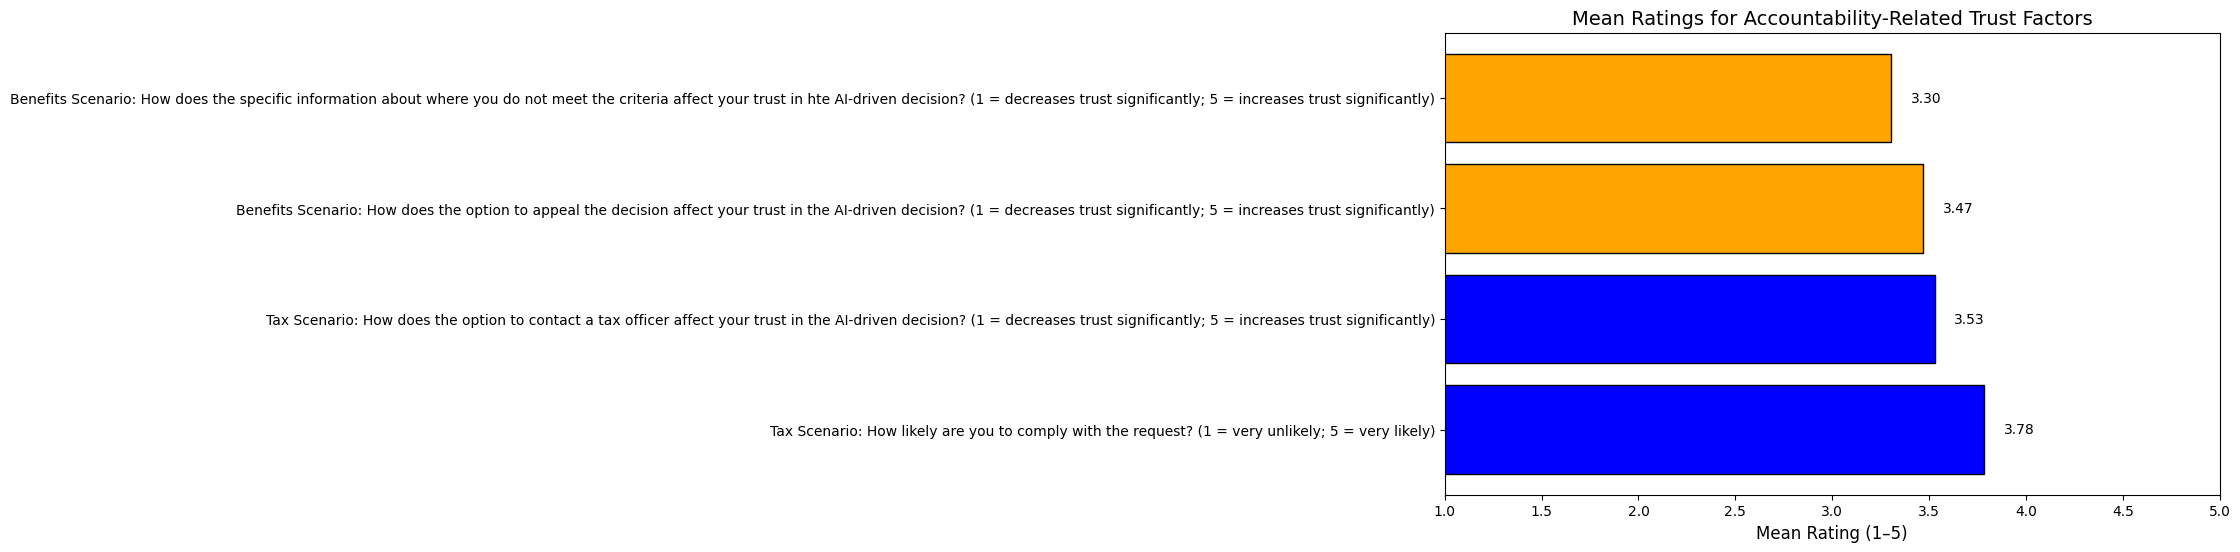

In [67]:
# Step 1: Expanded Accountability-Related Questions
accountability_factors_tax = [
    'Tax Scenario: How likely are you to comply with the request? (1 = very unlikely; 5 = very likely)',
    'Tax Scenario: How does the option to contact a tax officer affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)'
]

accountability_factors_benefits = [
    'Benefits Scenario: How does the option to appeal the decision affect your trust in the AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)',
    'Benefits Scenario: How does the specific information about where you do not meet the criteria affect your trust in hte AI-driven decision? (1 = decreases trust significantly; 5 = increases trust significantly)'
]

# Calculate mean ratings for accountability in both scenarios
tax_accountability_means = df[accountability_factors_tax].mean(axis=0)
benefits_accountability_means = df[accountability_factors_benefits].mean(axis=0)

print(tax_accountability_means)
print(benefits_accountability_means)
# Visualization
labels = accountability_factors_tax + accountability_factors_benefits
means = list(tax_accountability_means) + list(benefits_accountability_means)

plt.figure(figsize=(10, 6))
plt.barh(labels, means, color=['blue', 'blue', 'orange', 'orange'], edgecolor='black')
plt.title('Mean Ratings for Accountability-Related Trust Factors', fontsize=14)
plt.xlabel('Mean Rating (1–5)', fontsize=12)
plt.xlim(1, 5)  # Ensure the x-axis starts at 1 and ends at 5
for i, mean in enumerate(means):
    plt.text(mean + 0.1, i, f"{mean:.2f}", va='center', fontsize=10)
plt.tight_layout()
plt.show()

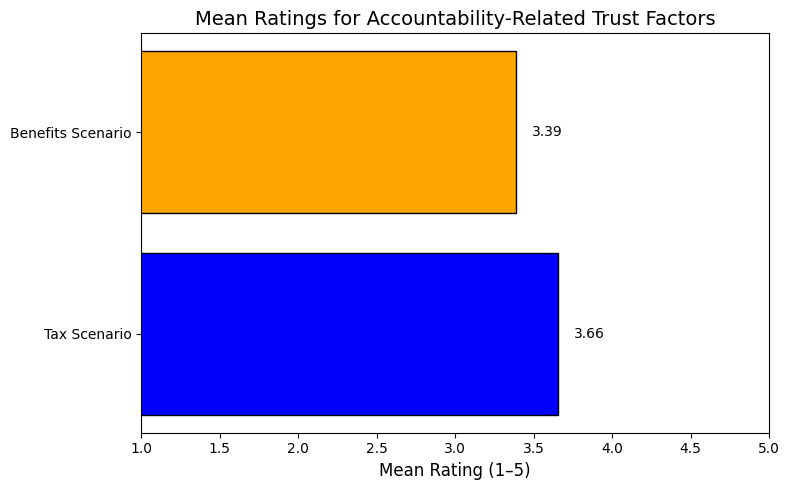

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate mean ratings for accountability across the two scenarios
tax_accountability_mean = df[accountability_factors_tax].mean().mean()
benefits_accountability_mean = df[accountability_factors_benefits].mean().mean()

# Combine results into a DataFrame
scenario_means = pd.DataFrame({
    'Scenario': ['Tax Scenario', 'Benefits Scenario'],
    'Mean Rating': [tax_accountability_mean, benefits_accountability_mean]
})

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(
    scenario_means['Scenario'], 
    scenario_means['Mean Rating'], 
    color=['blue', 'orange'], 
    edgecolor='black'
)

# Add mean values above the bars
for bar in bars:
    ax.text(
        bar.get_width() + 0.1,  # Position to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Vertically centered
        f"{bar.get_width():.2f}",
        va='center',
        fontsize=10
    )

# Set axis limits and labels
ax.set_xlim(1, 5)  # Mean ratings range from 1 to 5
ax.set_xlabel('Mean Rating (1–5)', fontsize=12)
ax.set_title('Mean Ratings for Accountability-Related Trust Factors', fontsize=14)

# Add styling
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-warning">

### Substep 8.2: Analyze General Accountability Factors in the Survey

#### General accountability-related questions in the survey:
1. *"Influence Trust Factors: Human oversight on each AI decision"*
2. *"Influence Trust Factors: The ability to appeal AI decisions"*
3. *"Influence Trust Factors: Regular audits of the AI system"*
4. *"Influence Trust Factors: Public reporting on AI decision-making outcomes"*

#### Analysis Plan:
1. Calculate the **mean ratings** for these general accountability-related trust factors.
2. Compare the ratings across different accountability dimensions to identify which accountability measure is perceived as most influential.
3. Perform the **Friedman test** to assess if there are significant differences between the accountability factors.
4. Visualize the results with a **bar plot** to display the mean ratings and a **table** to summarize the test results.


### Why Use the Friedman Test Instead of Kruskal-Wallis?

The choice of test depends on whether the data groups are independent or dependent:

- **Kruskal-Wallis Test**:
  - Used for **independent groups** (e.g., comparing trust ratings between respondents with and without prior AI interaction).
  - Example: Trust levels based on familiarity with AI.

- **Friedman Test**:
  - Used for **dependent groups** (e.g., comparing ratings of multiple accountability factors by the **same respondents**).
  - Example: Comparing ratings for "Human oversight," "Ability to appeal," and "Regular audits" provided by the same individuals.

In this step, since we are comparing ratings of accountability factors by the same respondents, the data is **dependent**, making the Friedman test the correct choice.


Mean Ratings for Accountability Factors:
Influence Trust Factors: Human oversight on each AI decision    4.147059
Influence Trust Factors: The ability to appeal AI decisions     4.078431
Influence Trust Factors: Regular audits of the AI system        4.029703
dtype: float64

Standard Deviation for Accountability Factors:
Influence Trust Factors: Human oversight on each AI decision    0.871974
Influence Trust Factors: The ability to appeal AI decisions     0.930094
Influence Trust Factors: Regular audits of the AI system        1.004544
dtype: float64


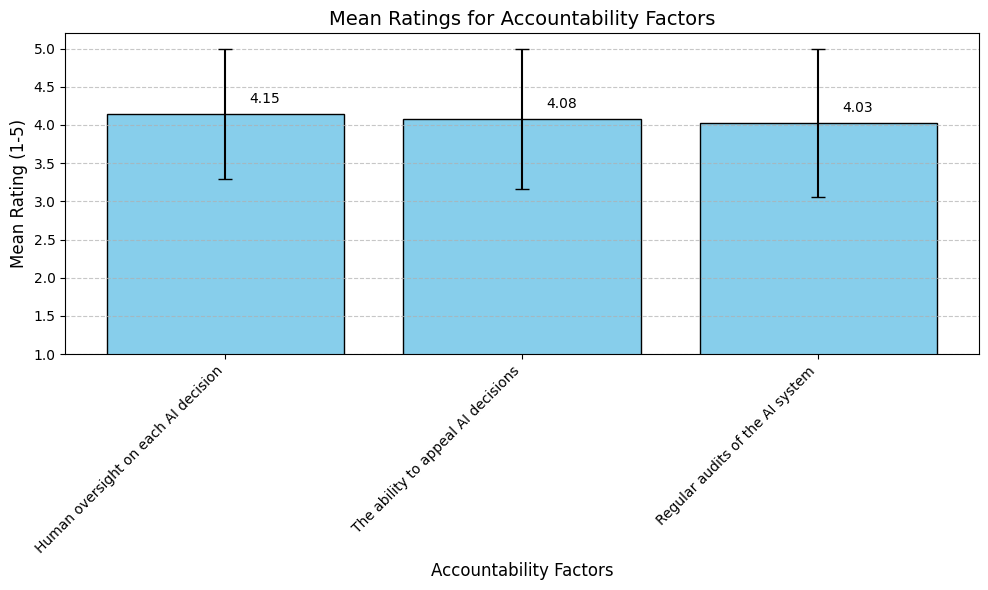

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Define the accountability factors with shorter names
accountability_columns = [
    "Influence Trust Factors: Human oversight on each AI decision",
    "Influence Trust Factors: The ability to appeal AI decisions",
    "Influence Trust Factors: Regular audits of the AI system",
]

# Renamed variables for the x-axis
renamed_labels = [
    "Human oversight on each AI decision",
    "The ability to appeal AI decisions",
    "Regular audits of the AI system",
]

# Subset the data for these columns
accountability_data = df[accountability_columns]

# Calculate mean and standard deviation for each factor
mean_ratings = accountability_data.mean()
std_ratings = accountability_data.std()

# Display the mean and standard deviation
print("Mean Ratings for Accountability Factors:")
print(mean_ratings)
print("\nStandard Deviation for Accountability Factors:")
print(std_ratings)

# Cap error bars at 5 (upper limit)
std_ratings_capped = np.minimum(mean_ratings + std_ratings, 5) - mean_ratings

# Create a bar plot with capped error bars
plt.figure(figsize=(10, 6))
bars = plt.bar(
    renamed_labels,
    mean_ratings,
    yerr=std_ratings_capped,
    color='skyblue',
    edgecolor='black',
    capsize=5
)

# Set Y-axis scale with room above 5
plt.ylim(1, 5.2)  # Slightly above 5 for visual clarity

# Add mean values on top of bars
for bar, mean in zip(bars, mean_ratings.values):
    plt.text(
        bar.get_x() + bar.get_width() / 1.5,  # Adjusted for slight right shift
        bar.get_height() + 0.1,
        f'{mean:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Add labels, title, and styling
plt.title("Mean Ratings for Accountability Factors", fontsize=14)
plt.ylabel("Mean Rating (1-5)", fontsize=12)
plt.xlabel("Accountability Factors", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



